In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing dataset
mdata = pd.read_csv(r"C:\Users\SHELY MULIAWATI\Desktop\materi bootupai\maintenance_data.csv")

In [10]:
mdata

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [5]:
mdata.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [6]:
mdata.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,996.000000,1000.000000,997.000000
mean,55.195000,0.397000,98.681100,111.088723,100.553499
std,26.472737,0.489521,19.879703,41.839005,19.592059
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.562282,94.532547,87.672094
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.253190,113.532970,113.522496
max,93.000000,1.000000,173.282541,1156.493254,172.544140


In [7]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   broken          1000 non-null   int64  
 2   pressureInd     996 non-null    float64
 3   moistureInd     1000 non-null   float64
 4   temperatureInd  997 non-null    float64
 5   team            1000 non-null   object 
 6   provider        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [12]:
#checking if there's any typos or missing value for datatype that contain strings
mdata.team.unique()

array(['TeamA', 'TeamC', 'TeamB'], dtype=object)

In [13]:
#checking if there's any typos or missing value for datatype that contain strings
mdata.provider.unique()

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

In [14]:
#looking for any missing value in the dataset 
mdata.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

In [15]:
#Checking if there's any duplicated entries
mdata.duplicated().sum()

0

In [17]:
#checking the skewness of pressureInd
mdata['pressureInd'].skew()

0.11754076383826763

In [19]:
#checking the skewness of temperatureInd
mdata['temperatureInd'].skew()

-0.07083889645180956

In [23]:
#pressureInd is positively skewed 
#temperatureInd is negatively skewed
#fill in missing value in those attributes with median

In [28]:
mdata.isnull().sum()

lifetime          0
broken            0
pressureInd       4
moistureInd       0
temperatureInd    3
team              0
provider          0
dtype: int64

In [32]:
mdata[["pressureInd","temperatureInd"]]

,pressureInd,temperatureInd
0,92.178854,96.517159
1,72.075938,87.271062
2,96.272254,112.196170
3,94.406461,72.025374
4,97.752899,103.756271
...,...,...
995,88.589759,99.861456
996,116.727075,95.075631
997,104.026778,83.221220
998,104.911649,83.421491


In [37]:
pd.isna(mdata['pressureInd'])

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: pressureInd, Length: 1000, dtype: bool

In [41]:
pd.isna(mdata['temperatureInd'])

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: temperatureInd, Length: 1000, dtype: bool

In [51]:
filltemp = mdata['temperatureInd'].median()
filltemp

100.52801459999999

In [52]:
fillpress = mdata['pressureInd'].median()
fillpress

97.31109067

In [57]:
mdata['pressureInd'].fillna(mdata.median())

0       92.178854
1       72.075938
2       96.272254
3       94.406461
4       97.752899
          ...    
995     88.589759
996    116.727075
997    104.026778
998    104.911649
999    116.901354
Name: pressureInd, Length: 1000, dtype: float64

In [59]:
mdata['temperatureInd'].fillna(mdata.median())

0       96.517159
1       87.271062
2      112.196170
3       72.025374
4      103.756271
          ...    
995     99.861456
996     95.075631
997     83.221220
998     83.421491
999     47.641493
Name: temperatureInd, Length: 1000, dtype: float64

In [62]:
mdata.['temperatureInd'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: temperatureInd, Length: 1000, dtype: bool

In [64]:
#INI YANG BENER BUAT ISI MISVAL
mdata.pressureInd.fillna(mdata.pressureInd.median(),inplace=True)

In [65]:
mdata.temperatureInd.fillna(mdata.temperatureInd.median(),inplace=True)

In [66]:
mdata.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

In [67]:
mdata.head()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1


In [68]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        1000 non-null   int64  
 1   broken          1000 non-null   int64  
 2   pressureInd     1000 non-null   float64
 3   moistureInd     1000 non-null   float64
 4   temperatureInd  1000 non-null   float64
 5   team            1000 non-null   object 
 6   provider        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [69]:
mdata.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.195000,0.397000,98.675620,111.088723,100.553422
std,26.472737,0.489521,19.840053,41.839005,19.562620
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.574091,94.532547,87.676913
50%,60.000000,0.000000,97.311091,102.844084,100.528015
75%,80.000000,1.000000,112.217466,113.532970,113.517905
max,93.000000,1.000000,173.282541,1156.493254,172.544140


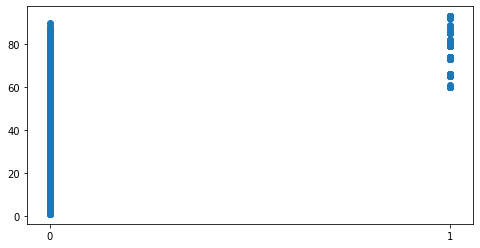

In [85]:
plt.figure(figsize=(8,4))
plt.xticks([0,1])
plt.scatter(mdata.broken, mdata.lifetime)

In [182]:
mdata['moistureInd'].skew()
#when skewness >1 artinya ada outlier

15.982324193831195

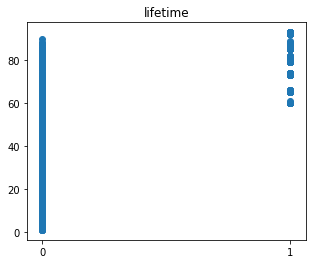

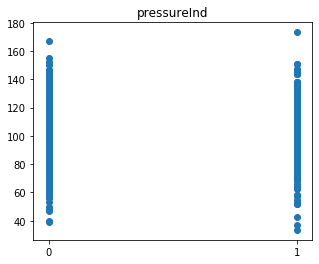

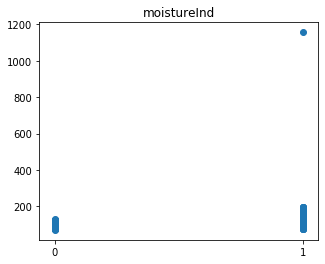

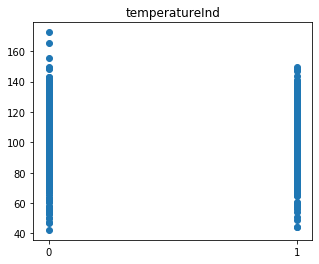

In [94]:
for col in ["lifetime","pressureInd","moistureInd","temperatureInd"]:
    plt.figure(figsize=(5,4))
    plt.scatter(mdata.broken, mdata[col])
    plt.xticks([0,1])
    plt.title(col)
    plt.show()

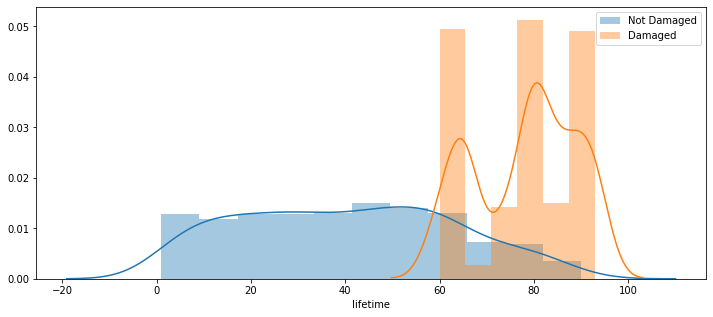

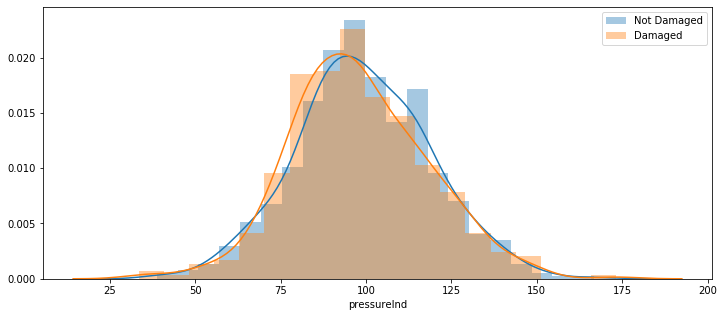

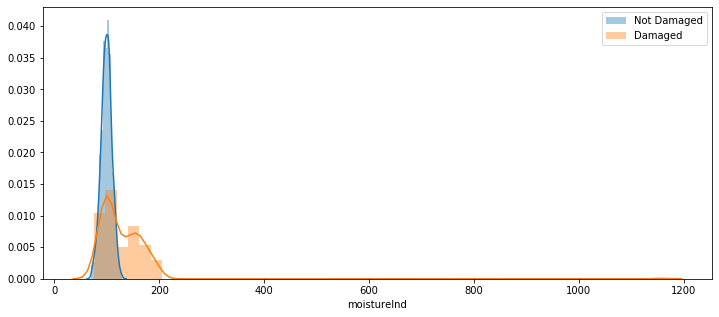

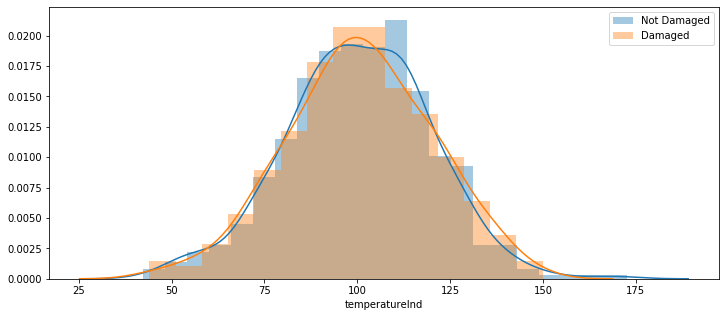

In [98]:
for col in ["lifetime","pressureInd","moistureInd","temperatureInd"]:
    plt.figure(figsize=(12,5))
    sns.distplot(mdata[col][mdata.broken==0])
    sns.distplot(mdata[col][mdata.broken==1])
    plt.legend(['Not Damaged','Damaged'])
    plt.show()

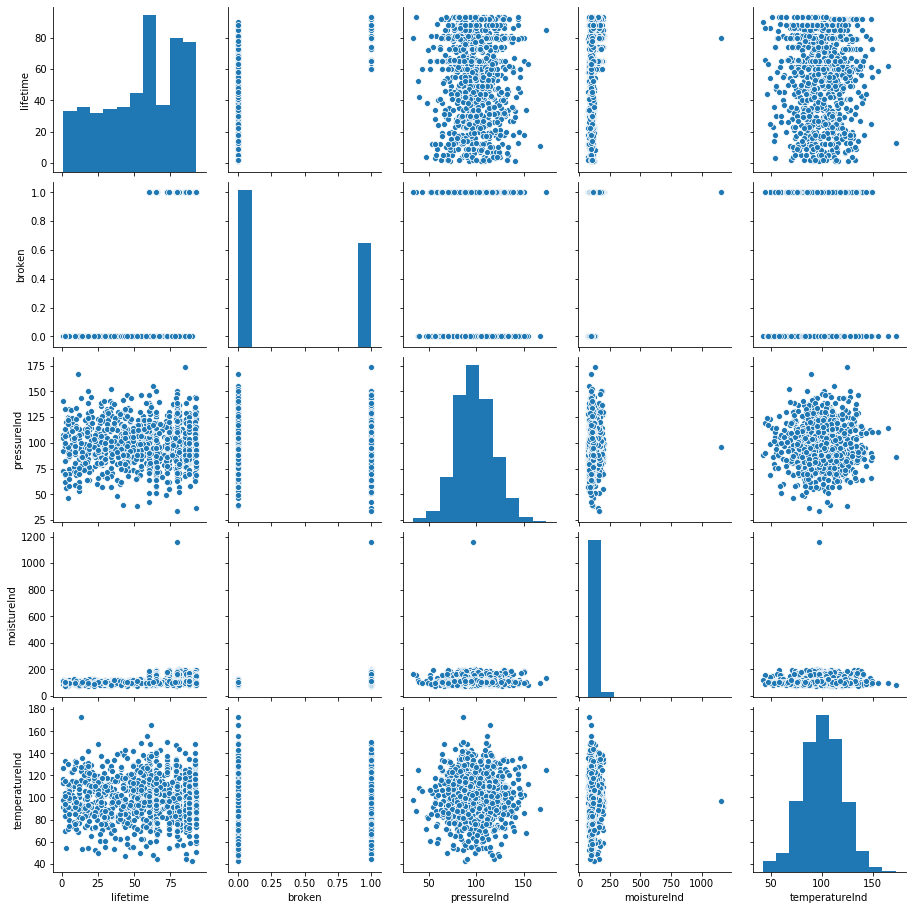

In [99]:
sns.pairplot(mdata)

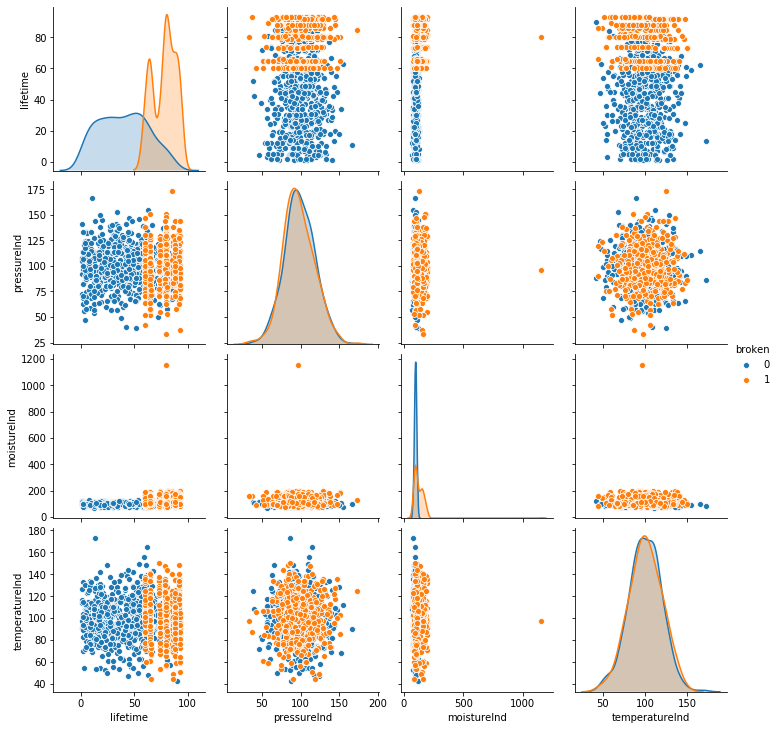

In [12]:
sns.pairplot(mdata, hue="broken")

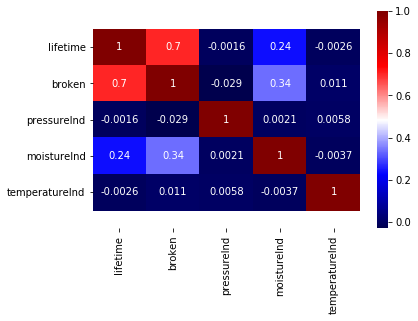

In [118]:
cor = mdata.corr()
plt.figure
ax = sns.heatmap(cor,annot=True,cmap="seismic")
bot,top=ax.get_ylim()
ax.set_ylim(bot+0.5,top-0.5)
plt.show()

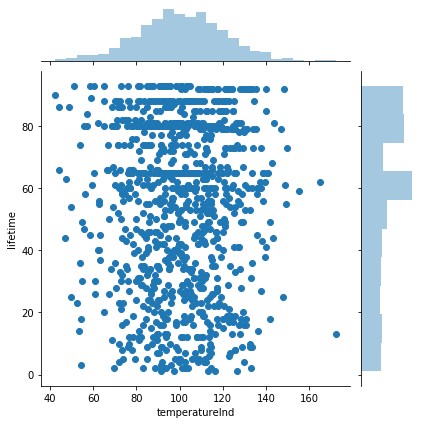

In [115]:
sns.jointplot(x="temperatureInd", y="lifetime", data=mdata);

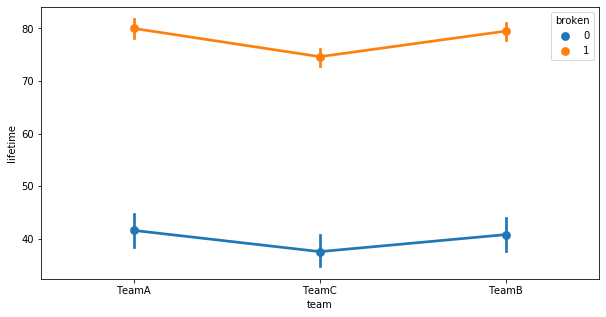

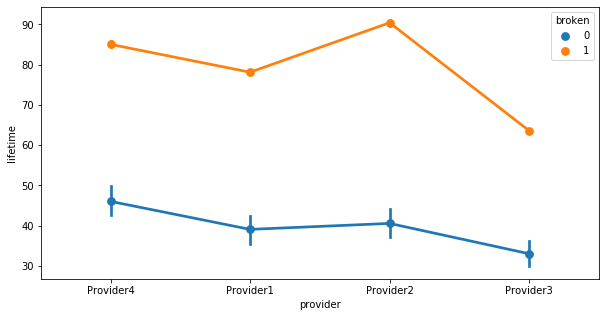

In [129]:
for col in ["team","provider"]:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=col,y="lifetime",hue="broken",data=mdata)
    plt.show()

<Figure size 720x360 with 0 Axes>

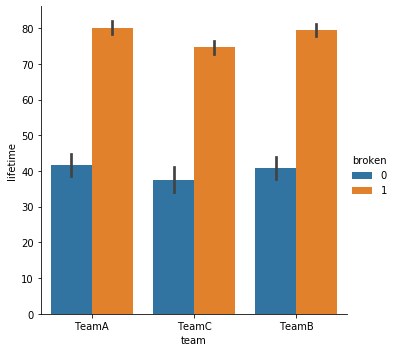

<Figure size 720x360 with 0 Axes>

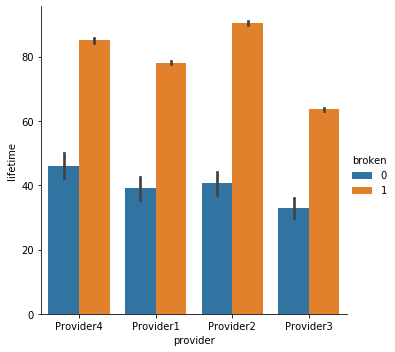

In [139]:
for col in ["team","provider"]:
    plt.figure(figsize=(10,5))
    sns.catplot(x=col, y="lifetime", hue="broken", kind="bar", data=mdata)


<Figure size 216x144 with 0 Axes>

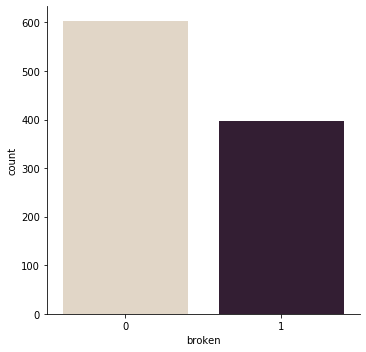

<Figure size 216x144 with 0 Axes>

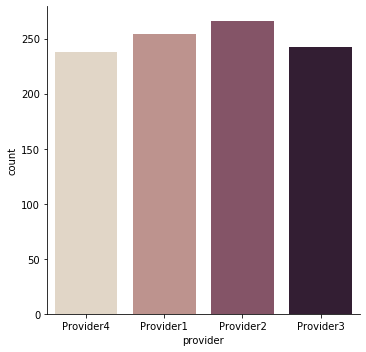

<Figure size 216x144 with 0 Axes>

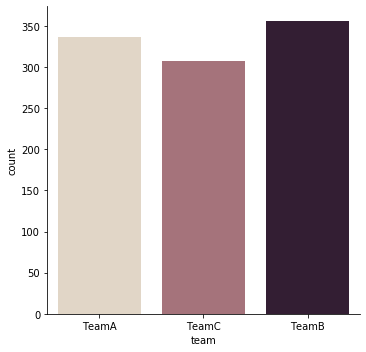

In [144]:
for col in ["broken","provider","team"]:
    plt.figure(figsize=(3,2))
    sns.catplot(x=col, kind="count", palette="ch:.25", data=mdata);

Text(0, 0.5, 'Moisture')

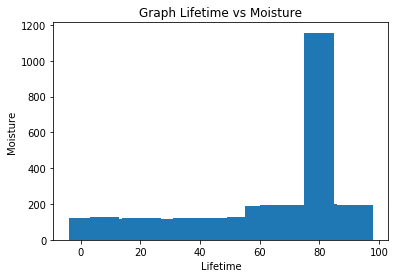

In [172]:
plt.bar(mdata['lifetime'], mdata['moistureInd'], width=10)
plt.title("Graph Lifetime vs Moisture")
plt.xlabel("Lifetime")
plt.ylabel("Moisture")

Text(0, 0.5, 'Pressure')

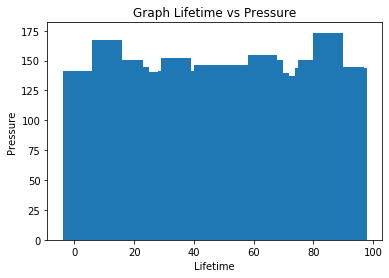

In [173]:
plt.bar(mdata['lifetime'], mdata['pressureInd'], width=10)
plt.title("Graph Lifetime vs Pressure")
plt.xlabel("Lifetime")
plt.ylabel("Pressure")

Text(0, 0.5, 'Temperature')

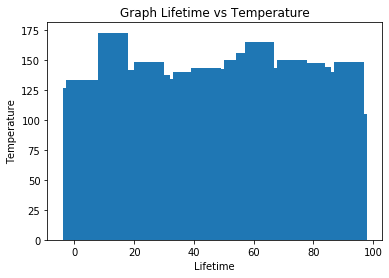

In [186]:
plt.bar(mdata['lifetime'], mdata['temperatureInd'], width=10)
plt.title("Graph Lifetime vs Temperature")
plt.xlabel("Lifetime")
plt.ylabel("Temperature")

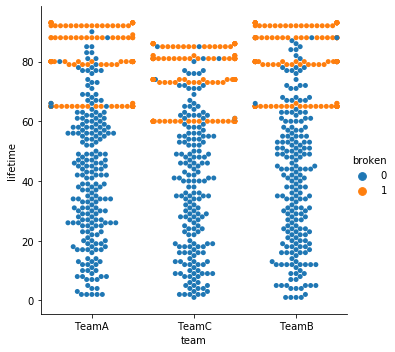

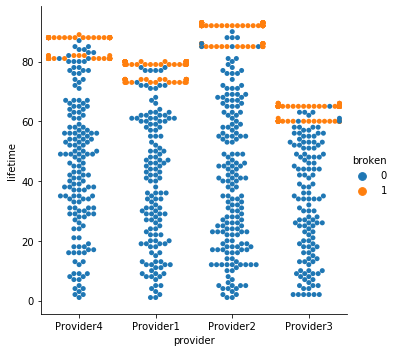

In [181]:
for col in ["team","provider"]:
    sns.catplot(x=col, y="lifetime", hue="broken", kind="swarm", data=mdata)

Text(0, 0.5, 'Temperature')

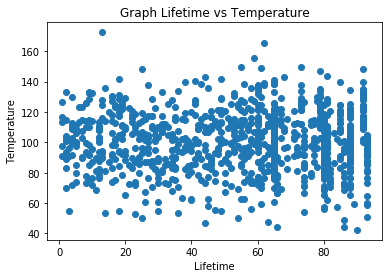

In [187]:
plt.scatter(mdata['lifetime'], mdata['temperatureInd'])
plt.title("Graph Lifetime vs Temperature")
plt.xlabel("Lifetime")
plt.ylabel("Temperature")

In [191]:
mdata['temperatureInd'].skew()

-0.0709333252735508

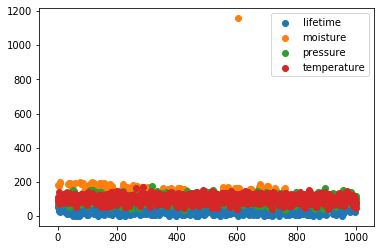

In [208]:
#NGECEK KALAU ADA OUTLIER
for col in ["lifetime","moistureInd","pressureInd","temperatureInd"]:
    plt.scatter(mdata.index,mdata[col])
    plt.legend(["lifetime","moisture","pressure","temperature"])

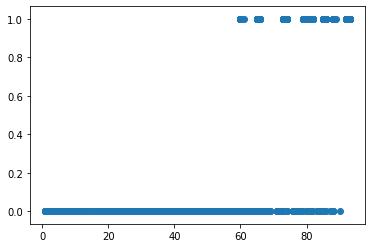

In [211]:
plt.scatter(mdata.lifetime,mdata.broken)

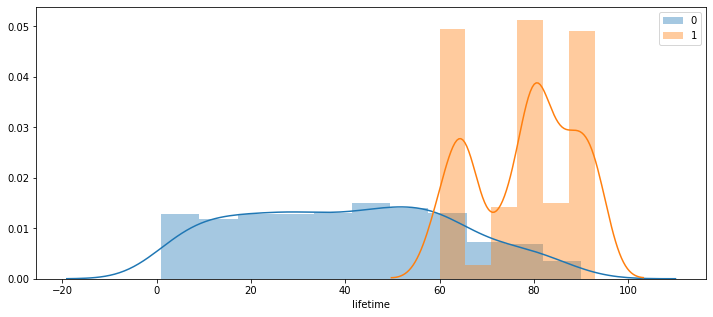

In [212]:
plt.figure(figsize=(12,5))
sns.distplot(mdata['lifetime'][mdata.broken==0])
sns.distplot(mdata['lifetime'][mdata.broken==1])
plt.legend(['0','1'])
plt.show()

In [218]:
plt.figure(figsize=(10,5))
sns.pointplot(x=provider",y="lifetime",hue="broken",data=mdata)
plt.show()

SyntaxError: invalid syntax (<ipython-input-218-ad37f421ad75>, line 2)